<h1 style="font-size: 60px; font-weight: bold">Global Terrorist Data Analysis</h1>
<h2>Analyst: Aerbhert John Sanchez</h2>

<h1 style="font-size: 35px; font-weight: bold;">#1. Data Preparation</h1>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from IPython.display import display, HTML
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings("ignore")

In [2]:
def print(*args, sep=' ', end='\n', **kwargs):
    output = sep.join(map(str, args)) + end
    styled_output = f'<p style="font-size: 20px;">{output}</p>'
    display(HTML(styled_output))

In [3]:
Terrorist = pd.read_csv("datasets/Global_terrorist.csv", encoding= 'ISO-8859-1')

<h1 style="font-size: 35px; font-weight: bold";>#2 Data Cleansing</h1>

In [4]:
# Terrorist["longitude"].mode()
# Terrorist["latitude"].mode()

In [5]:
# Terrorist["longitude"]= Terrorist["longitude"].fillna(Terrorist["longitude"].mode()[0])
# Terrorist["latitude"]= Terrorist["latitude"].fillna(Terrorist["latitude"].mode()[0])

In [6]:
Terrorist["iyear"]=Terrorist["iyear"].astype("category")
Terrorist["imonth"]=Terrorist["imonth"].astype("category")
Terrorist["iday"]=Terrorist["iyear"].astype("category")
Terrorist["latitude"]=Terrorist["latitude"].astype("float")
Terrorist["longitude"]=Terrorist["longitude"].astype("float")

<h1 style="font-size: 35px; font-weight: bold";>#3 Insights</h1>


In [7]:
!pip install folium

<p style="font-size: 20px; font-weight: bold;">1. Concentration of Terrorism in Turkey in  2017</p>

In [8]:
Terrorist_2017 = Terrorist[Terrorist['iyear'] == 2017]

In [9]:
Turkey_2017 = Terrorist_2017[Terrorist_2017['country_txt'] == 'Turkey']


In [10]:
Turkey_2017 = Turkey_2017.dropna(subset=['latitude', 'longitude'])


In [11]:
import folium
from folium.plugins import HeatMap

map_center = [Turkey_2017['latitude'].mean(), Turkey_2017['longitude'].mean()]
base_map = folium.Map(location=map_center, zoom_start=15)

heat_data = Turkey_2017[['latitude', 'longitude']].values.tolist()
HeatMap(heat_data).add_to(base_map)

base_map


In [12]:
print("Terrorist incidents in 2017 were heavily concentrated in the southeast, near the borders with Syria, Iraq, and Iran, while the western half of the country has fewer activity.")

<p style="font-size: 20px; font-weight: bold;">2. Incidents per month in Turkey in  2017</p>

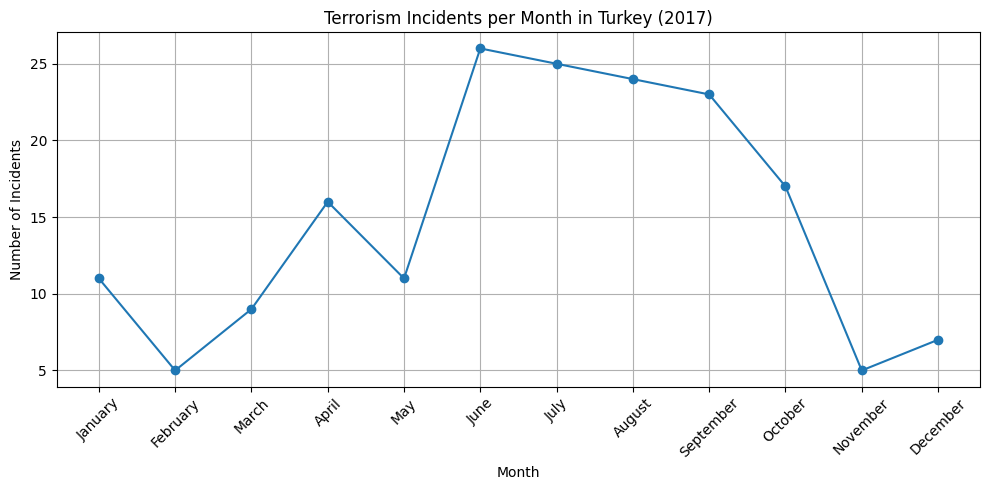

In [13]:
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']


monthly_counts = Turkey_2017['imonth'].value_counts().reindex(range(1, 13), fill_value=0)


plt.figure(figsize=(10, 5))
plt.plot(months, monthly_counts.values, marker='o')
plt.title('Terrorism Incidents per Month in Turkey (2017)')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(months, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
print("The graph shows that June in 2017 has the highest number of terrorism in Turkey")

In [15]:
from scipy.stats import chisquare

monthly_counts = Turkey_2017['imonth'].value_counts().reindex(range(1, 13), fill_value=0)

chi2_stat, p_value = chisquare(monthly_counts)


if p_value < 0.05:
    print("✅ There is a statistically significant difference in incidents across months.")
else:
    print("❌ No significant difference in incidents across months.")


<p style="font-size: 20px; font-weight: bold;">3. Concentration of Terrorism in Turkey in  2016</p>

In [16]:
Terrorist_2016 = Terrorist[Terrorist['iyear'] == 2016]


In [17]:
Turkey_2016 = Terrorist_2016[Terrorist_2016['country_txt'] == 'Turkey']


In [18]:
Turkey_2016 = Turkey_2016.dropna(subset=['latitude', 'longitude'])


In [19]:
map_center2 = [Turkey_2016['latitude'].mean(), Turkey_2016['longitude'].mean()]
base_map2 = folium.Map(location=map_center2, zoom_start=15)

heat_data2 = Turkey_2016[['latitude', 'longitude']].values.tolist()
HeatMap(heat_data2).add_to(base_map2)

base_map2


In [20]:
print("Southeastern Turkey experienced the highest frequency of attacks, same in 2017 but with more incidents")

<p style="font-size: 20px; font-weight: bold;">4. Incidents in Turkey in  2016</p>

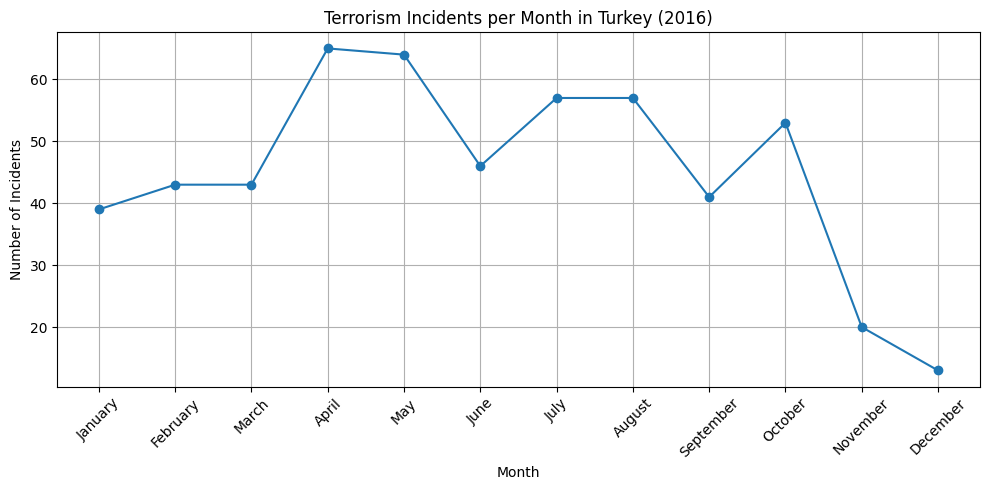

In [21]:
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']


monthly_counts2 = Turkey_2016['imonth'].value_counts().reindex(range(1, 13), fill_value=0)


plt.figure(figsize=(10, 5))
plt.plot(months, monthly_counts2.values, marker='o')
plt.title('Terrorism Incidents per Month in Turkey (2016)')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(months, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
print("The highest number of incidents happen during April. Its likely due to the weather condition is ideal for terrorist")

In [23]:

monthly_counts2 = Turkey_2016['imonth'].value_counts().reindex(range(1, 13), fill_value=0)
chi2_stat2, p_value2 = chisquare(monthly_counts2)


if p_value2 < 0.05:
    print("✅ There is a statistically significant difference in incidents across months. T Similar to 2017, the distribution of terrorism incidents is not uniform.")
else:
    print("❌ No significant difference in incidents across months.")


<p style="font-size: 20px; font-weight: bold;">5. Comparison of 2016 and 2017 in terms of frequency of Terrorism incidents</p>

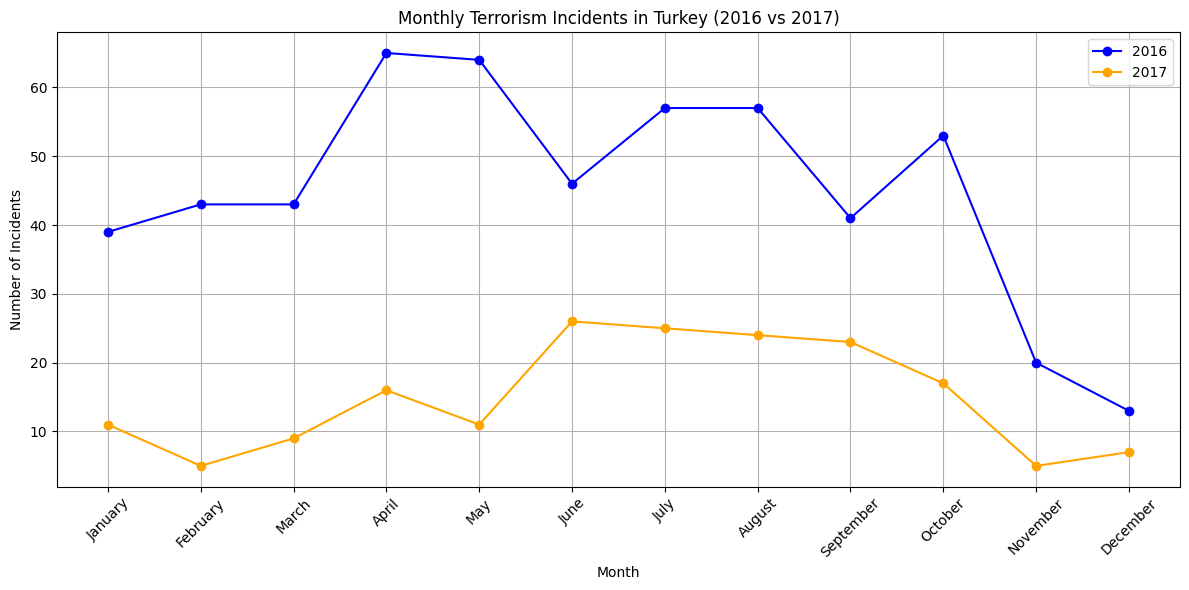

In [24]:
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']


monthly_counts_2016 = Turkey_2016['imonth'].value_counts().reindex(range(1, 13), fill_value=0)
monthly_counts_2017 = Turkey_2017['imonth'].value_counts().reindex(range(1, 13), fill_value=0)

plt.figure(figsize=(12, 6))
plt.plot(months, monthly_counts_2016.values, marker='o', label='2016', color='blue')
plt.plot(months, monthly_counts_2017.values, marker='o', label='2017', color='orange')

plt.title('Monthly Terrorism Incidents in Turkey (2016 vs 2017)')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
print("We can conclude that the decrease in terrorism incidents in Turkey was likely influenced by improvements in intelligence gathering, border security, and law enforcement coordination, which made it more difficult for terrorist groups to operate.")
